In [559]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


# "Will it snow tomorrow?" - The time traveler asked
The following dataset contains climate information form over 9000 stations accross the world. The overall goal of these subtasks will be to predict whether it will snow tomorrow 11 years ago. So if today is 2021.02.15 then the weather we want to forecast is for the date 2010.02.16. You are suppsed to solve the tasks using Big Query, which can be used in the Jupyter Notebook like it is shown in the following cell. For further information and how to used BigQuery in Jupyter Notebook refer to the Google Docs. 

The goal of this test is, to test your coding knowledge in Python, BigQuery and Pandas as well as your understanding of Data Science. If you get stuck at the first part, you can use the replacement data provided in the second part

In [560]:
%%bigquery 
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20 


Downloading: 100%|██████████| 20/20 [00:02<00:00,  7.20rows/s]


,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39730,99999,1929,10,20,52.799999,4,45.500000,4.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
1,33110,99999,1929,12,18,47.500000,4,44.000000,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
2,37770,99999,1931,4,24,50.200001,4,44.299999,4.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
3,726810,24131,1931,6,23,65.099998,24,41.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
4,726810,24131,1931,3,2,42.799999,24,31.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
5,726810,24131,1931,9,17,67.000000,24,40.500000,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
6,726810,24131,1931,8,7,68.400002,24,37.200001,8.0,NaN,...,NaN,None,0.0,NaN,False,False,False,False,False,False
7,726810,24131,1932,7,14,64.099998,24,54.099998,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
8,726810,24131,1932,10,23,41.099998,24,31.000000,8.0,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
9,726810,24131,1932,1,5,24.600000,24,21.100000,8.0,NaN,...,NaN,None,NaN,NaN,True,True,True,True,True,True


## Part 1

### 1. Task
*Change the date format to 'YYYY-MM-DD' and select the data from 2006 till 2010 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010.*

In [ ]:
# BigQuery Authorization
#import os
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="sl-ds-coding-challenge.json"

In [561]:
# import pandas
import pandas as pd

In [562]:
%%bigquery weather_df
SELECT 
DATE(year, month, day) as date, * EXCEPT(year, month, day), 
FROM `bigquery-public-data.samples.gsod`
WHERE year BETWEEN 2006 AND 2010 
AND station_number BETWEEN 725300 AND 726300

Downloading: 100%|██████████| 323801/323801 [00:10<00:00, 31841.66rows/s]


In [563]:
weather_df.head()

,date,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,2006-06-25,725835,99999,86.000000,4,34.700001,4.0,NaN,NaN,NaN,...,NaN,None,0.00,NaN,False,False,False,False,False,False
1,2006-10-16,725835,99999,47.799999,4,41.900002,4.0,NaN,NaN,NaN,...,NaN,None,0.15,NaN,False,False,False,False,False,False
2,2006-12-04,725409,99999,19.799999,5,16.200001,5.0,NaN,NaN,NaN,...,NaN,None,NaN,NaN,False,False,False,False,False,False
3,2006-01-18,725869,99999,35.599998,5,31.299999,5.0,NaN,NaN,NaN,...,NaN,None,0.29,NaN,False,False,False,False,False,False
4,2006-01-06,725868,99999,18.299999,5,16.500000,5.0,NaN,NaN,NaN,...,NaN,None,0.00,2.0,False,False,False,False,False,False


*Comments: testing simple logical conditining, knowledge about sql syntax, and ability to find in doc how to store as df variable*

### 2. Task 
*From here want to work with the data from all stations that have information from 2005 till 2010. Select the relevant data.*

To identify which stations have information from 2005 to 2010, I first look at the max date:

In [564]:
%%bigquery 
SELECT MAX(DATE(year, month, day))
FROM `bigquery-public-data.samples.gsod`

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.64s/rows]


,f0_
0,2010-04-16


Then I check the number of days between 2005-01-01 and this max date:

In [565]:
# total number of days between 2005 and 2010
from datetime import datetime
datetime.strptime("2010-04-16", "%Y-%m-%d") - datetime.strptime("2005-01-01", "%Y-%m-%d")

datetime.timedelta(days=1931)

There are 1,931 dates between 2005-01-01 and the max date in the time series data, which is 2010-04-16. Hence, I select all stations with (at least) 1931 rows.

In [566]:
%%bigquery weather
SELECT DATE(year, month, day) as date, * EXCEPT(year, month, day), 
FROM `bigquery-public-data.samples.gsod`
WHERE station_number IN (
    SELECT station_number
    FROM `bigquery-public-data.samples.gsod`
    WHERE (year BETWEEN 2005 AND 2010)
    GROUP BY station_number
    HAVING COUNT(*) >= 1931
) AND year BETWEEN 2005 AND 2010

Downloading: 100%|██████████| 200825/200825 [00:06<00:00, 29679.96rows/s]


*Do a first analysis of the remaining dataset, clean or drop data depending on how you see appropriate.*

In [567]:
# set date as index
weather["date"] = pd.to_datetime(weather["date"])
weather.set_index("date", inplace=True)
weather.sort_index(inplace=True)

In [568]:
weather.groupby("station_number").size().max()

1932

The max length of the time series for a station number is 1,932, however, should be 1,931. Taking a closer look:

In [569]:
weather.groupby("station_number").filter(lambda x: len(x) > 1931)["station_number"].unique()

array([702740])

There is one station (702740) for which there are more than 1,931 dates. Check for duplicates:

In [570]:
is_dupl = weather.loc[weather["station_number"] == 702740].index.duplicated()
weather.loc[weather["station_number"] == 702740][is_dupl]

,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
date,,,,,,,,,,,,,,,,,,,,,
2008-11-20,702740,99999,12.3,23,7.1,23.0,1008.400024,23.0,NaN,NaN,...,NaN,None,0.0,2.0,False,False,False,False,False,False


Look at duplicated rows/dates:

In [571]:
dupl_date = weather.loc[weather["station_number"] == 702740][is_dupl].index
weather.loc[weather["station_number"] == 702740].loc[dupl_date]

,station_number,wban_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
date,,,,,,,,,,,,,,,,,,,,,
2008-11-20,702740,25331,12.3,23,7.1,23.0,1008.400024,23.0,NaN,NaN,...,NaN,None,0.0,2.0,False,False,False,False,False,False
2008-11-20,702740,99999,12.3,23,7.1,23.0,1008.400024,23.0,NaN,NaN,...,NaN,None,0.0,2.0,False,False,False,False,False,False


There are duplicate entries for 2008-11-20 and station 702740. Both entries are identical except the wban_number variable. Since wban_number is just another identifier and hence does probably not contain information about whether it will be snowing or not, I drop this column and remove the duplicate row.

In [572]:
weather.drop(columns="wban_number", inplace=True)
weather.drop_duplicates(inplace=True)

In [573]:
weather.groupby("station_number").size().value_counts()

1931    103
1930      1
dtype: int64

After dropping the duplicated rows, there is one station_number for which there are only 1,930 data points instead of 1,931. For simplicity reasons, I will drop this station from the data, the alternative would be to add the missing date and impute with meaningful information, e.g. mean value for same date from remaining years.

In [574]:
# find the station number for which there are 1930 only
weather.groupby("station_number").filter(lambda x: len(x) == 1930)["station_number"].unique() 

array([723700])

In [575]:
#drop the station 723700
weather = weather[weather.station_number != 723700]

### Inspecting Columns:

First, I look at the distribution of the data:

In [576]:
weather.describe()

,station_number,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,num_mean_sealevel_pressure_samples,mean_station_pressure,num_mean_station_pressure_samples,mean_visibility,num_mean_visibility_samples,mean_wind_speed,num_mean_wind_speed_samples,max_sustained_wind_speed,max_gust_wind_speed,max_temperature,min_temperature,total_precipitation,snow_depth
count,198893.000000,198893.000000,198893.000000,198645.000000,198645.000000,179050.000000,179050.000000,14683.000000,14683.000000,198887.000000,198887.000000,198874.000000,198874.000000,198558.000000,109206.000000,198884.000000,0.0,191736.000000,8320.000000
mean,720904.339806,55.437636,23.681381,42.339489,23.666677,1015.304899,22.313734,996.566948,21.682490,9.024003,23.678084,6.774072,23.653524,13.586315,23.099390,45.699631,NaN,0.084013,10.529760
std,6991.174501,20.177197,1.357134,19.322326,1.403610,7.792030,2.777258,26.399898,5.669421,1.826860,1.362635,3.762625,1.433375,5.552701,6.837255,19.985253,NaN,0.294973,10.552072
min,701740.000000,-55.200001,4.000000,-37.599998,4.000000,960.500000,4.000000,756.700012,4.000000,0.100000,4.000000,0.000000,4.000000,1.900000,9.900000,-56.900002,NaN,0.000000,1.200000
25%,722140.000000,42.700001,24.000000,28.799999,24.000000,1011.500000,22.000000,987.099976,23.000000,8.500000,24.000000,4.100000,24.000000,9.900000,18.100000,33.099998,NaN,0.000000,2.000000
50%,722976.000000,57.900002,24.000000,44.400002,24.000000,1015.599976,24.000000,1002.200012,24.000000,9.800000,24.000000,6.100000,24.000000,13.000000,22.000000,48.000000,NaN,0.000000,7.100000
75%,724640.000000,71.000000,24.000000,57.400002,24.000000,1019.799988,24.000000,1012.799988,24.000000,10.000000,24.000000,8.700000,24.000000,16.900000,27.000000,60.799999,NaN,0.010000,15.000000
max,725260.000000,105.599998,24.000000,80.099998,24.000000,1048.699951,24.000000,1039.199951,24.000000,63.799999,24.000000,41.000000,24.000000,64.900002,87.000000,95.000000,NaN,10.310000,79.900002


There are no obviously faulty entries at the first look, like for example missing values tagged as -9999. I now take a look at missing values:

In [577]:
# calculate share of missings for all columns
missings = weather.isna().sum()
miss_perc = missings / len(weather) * 100
round(miss_perc, 1)

station_number                          0.0
mean_temp                               0.0
num_mean_temp_samples                   0.0
mean_dew_point                          0.1
num_mean_dew_point_samples              0.1
mean_sealevel_pressure                 10.0
num_mean_sealevel_pressure_samples     10.0
mean_station_pressure                  92.6
num_mean_station_pressure_samples      92.6
mean_visibility                         0.0
num_mean_visibility_samples             0.0
mean_wind_speed                         0.0
num_mean_wind_speed_samples             0.0
max_sustained_wind_speed                0.2
max_gust_wind_speed                    45.1
max_temperature                         0.0
max_temperature_explicit                0.0
min_temperature                       100.0
min_temperature_explicit              100.0
total_precipitation                     3.6
snow_depth                             95.8
fog                                     0.0
rain                            

Looking at the above output one can see that there are mostly missing values for the variables "mean_station_pressure", "num_mean_station_pressure_samples", "max_gust_wind_speed", "min_temperature", "min_temperature_explicit", "snow_depth" hence I drop these columns entirely.

In [578]:
weather = weather.drop(columns=["mean_station_pressure", "num_mean_station_pressure_samples", "max_gust_wind_speed", "min_temperature", "min_temperature_explicit", "snow_depth"])

From the [documentation for the data](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=samples&t=gsod&page=table&hl=de&_ga=2.212216276.1106550381.1617978275-448503843.1614889316&project=sl-ds-coding-challenge), we can identify further variables which do not provide information for forecasting snow:
- *num_mean_temp_samples*: The number of observations used to calculate mean_temp.
- *num_mean_dew_point_samples*: The number of observations used to calculate mean_dew_point.
- *num_mean_sealevel_pressure*: The number of observations used to calculate mean_sealevel_pressure.
- *num_mean_visibility*: The number of observations used to calculate mean_visibility.
- *num_mean_wind_speed_samples*: The number of observations used to calculate mean_wind_speed.
- *max_temperature_explicit:* Indicates the source of max_temperature

Moreover, these variables do not contain much variation anyway:

In [580]:
cols = [name for name in weather.columns if 'num_' in name]
for col in cols:
    print("Variable name: {}".format(col))
    print(weather[col].value_counts(normalize=True))

Variable name: num_mean_temp_samples
24    0.881419
23    0.065915
22    0.019216
21    0.009110
20    0.005324
19    0.003007
17    0.002680
18    0.002544
15    0.002257
16    0.002217
14    0.001609
12    0.001207
13    0.001001
9     0.000709
10    0.000659
11    0.000573
8     0.000176
7     0.000156
6     0.000085
5     0.000070
4     0.000065
Name: num_mean_temp_samples, dtype: float64
Variable name: num_mean_dew_point_samples
24.0    0.878457
23.0    0.066737
22.0    0.019598
21.0    0.009489
20.0    0.005583
19.0    0.003217
17.0    0.002754
18.0    0.002708
16.0    0.002336
15.0    0.002311
14.0    0.001686
12.0    0.001299
13.0    0.001042
9.0     0.000740
10.0    0.000700
11.0    0.000619
8.0     0.000247
7.0     0.000181
6.0     0.000116
5.0     0.000096
4.0     0.000086
Name: num_mean_dew_point_samples, dtype: float64
Variable name: num_mean_sealevel_pressure_samples
24.0    0.542318
23.0    0.132399
22.0    0.084423
21.0    0.061229
20.0    0.045747
19.0    0.034867
18.0

In [581]:
# drop columns
weather = weather.drop(columns = cols)
weather = weather.drop(columns = "max_temperature_explicit")

## Correlation between Variables and Target

In [582]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

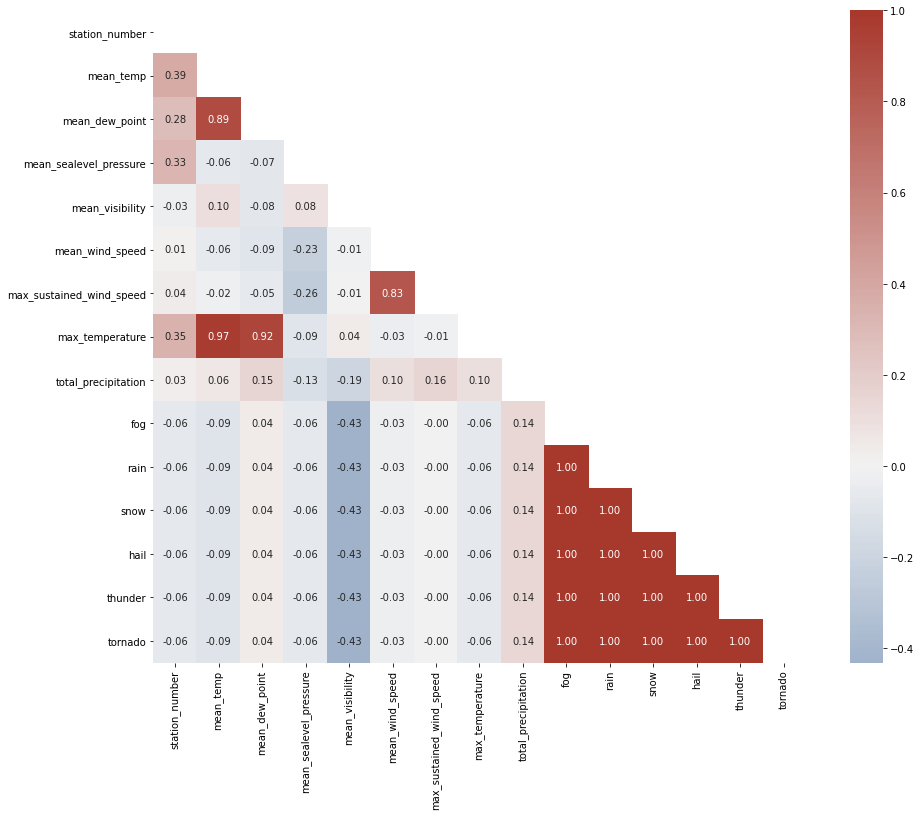

In [583]:
corrMat = weather.corr() # calculate correlation matrix
mask = np.triu(np.ones_like(corrMat, dtype=bool))
plt.figure(figsize=(16, 12))

# custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

# create correlation plot
sns.heatmap(corrMat, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
# show plot
plt.show()

In [585]:
# check how many entries are not equal in the following variables:
for col in ["fog", "rain", "hail", "thunder", "tornado"]:
    print(sum(weather.snow != weather[col]))

0
0
0
0
0


The binary variables indicating snow, rain, hail, thunder, and tornado are perfectly multicollinear. Since this leads to the fact that predicting whether it snows is exactly the same problem as predicting whether it rains, whether there is hail, etc. I remove these binary variables from the dataset as well.

In [586]:
weather = weather.drop(columns=["fog", "rain", "hail", "thunder", "tornado"])

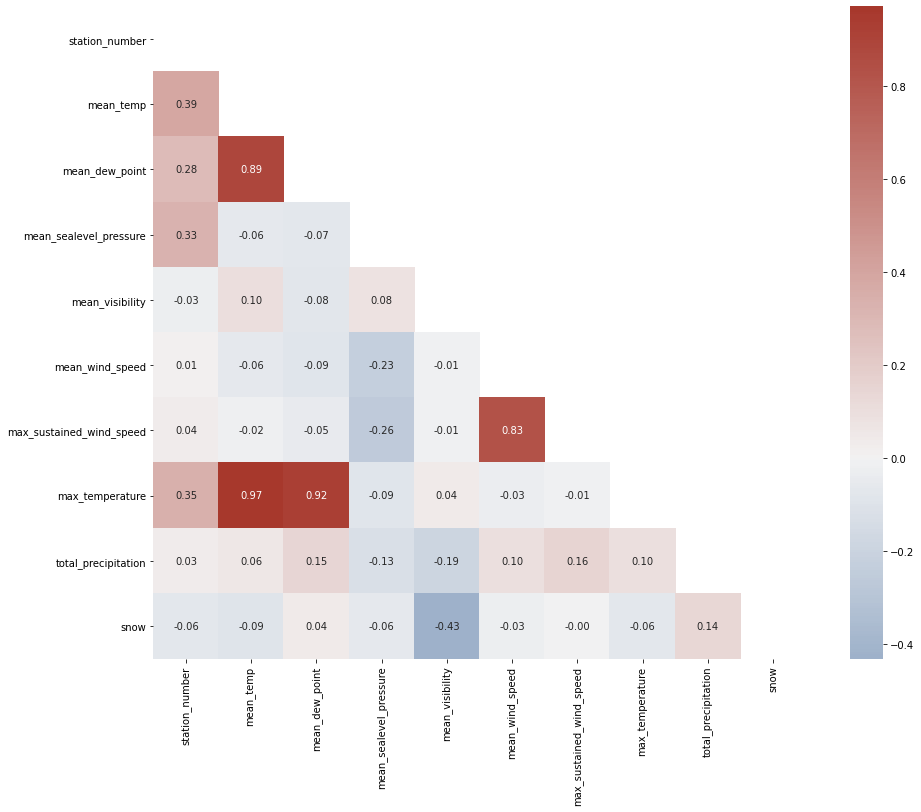

In [587]:
# repeating the correlation matrix
corrMat = weather.corr() # calculate correlation matrix
mask = np.triu(np.ones_like(corrMat, dtype=bool))
plt.figure(figsize=(16, 12))

# custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

# create correlation plot
sns.heatmap(corrMat, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
# show plot
plt.show()

We furthermore see that mean_temp and max_temperature are highly correlated with a correlation coefficient of 0.97. Moreover, when taking a closer look at both variables, a kind of strange picture emerges: 

In [588]:
sum(weather.mean_temp > weather.max_temperature) / len(weather)

0.9998793321031911

The mean temperature is higher than the max temperature for almost all entries in the data. A look in the data description reveals the following: `The time that this value is reported differs by country and region, so this value will sometimes not be the maximum for the calendar day.` Moreover, it is reasonable to assume that the max temperature does not contain as much information about whether it may snow as the mean temperature. Hence, the max_temperature variable is dropped as well.

In [589]:
weather = weather.drop(columns=["max_temperature"])

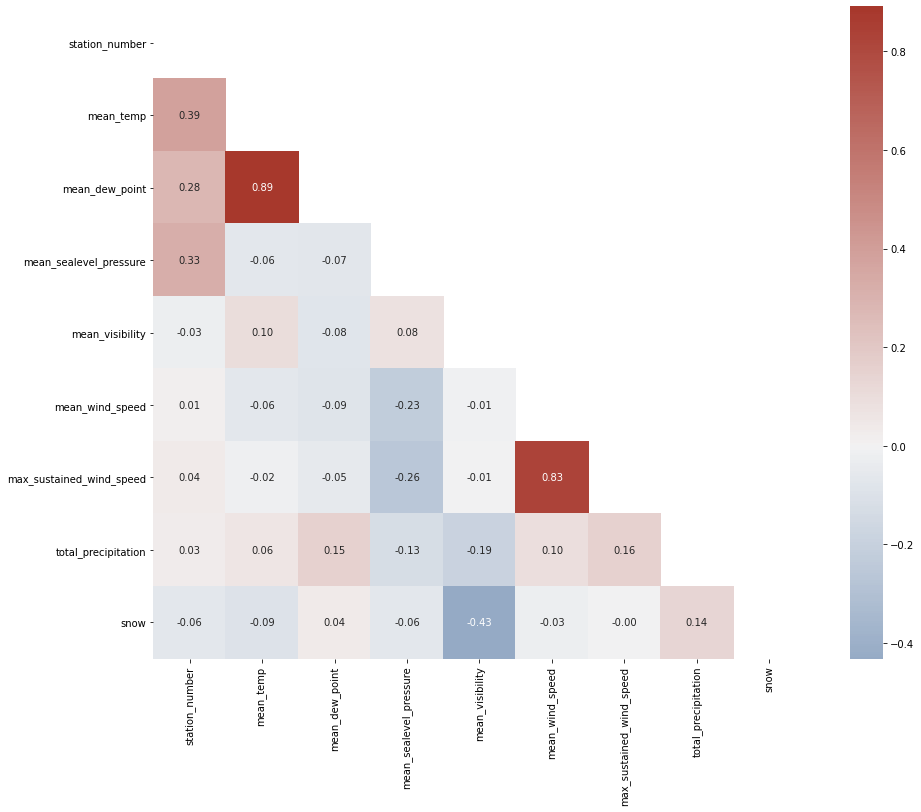

In [590]:
# repeating the correlation matrix
corrMat = weather.corr() # calculate correlation matrix
mask = np.triu(np.ones_like(corrMat, dtype=bool))
plt.figure(figsize=(16, 12))

# custom palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

# create correlation plot
sns.heatmap(corrMat, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)
# show plot
plt.show()

## Data Imputation

The last step before the modeling starts is to impute missing values in the data. Again, taking a look at the number of remaining missing values:

In [591]:
miss = weather.isna().sum()
miss

station_number                  0
mean_temp                       0
mean_dew_point                248
mean_sealevel_pressure      19843
mean_visibility                 6
mean_wind_speed                19
max_sustained_wind_speed      335
total_precipitation          7157
snow                            0
dtype: int64

There are a lot of missing values for mean_sealevel_pressure. Taking a closer look:

In [592]:
# count non-missing values per station
weather.groupby("station_number")["mean_sealevel_pressure"].agg("count")

station_number
701740    1931
702000    1931
702190    1930
702310    1928
702610    1928
          ... 
725200    1931
725205    1929
725240    1931
725246    1929
725260    1924
Name: mean_sealevel_pressure, Length: 103, dtype: int64

In [593]:
# check whether there are stations that have only missing values
sum(weather.groupby("station_number")["mean_sealevel_pressure"].agg("count") == 0)

10

In [594]:
# get stations for which there are only missings
empty_sea = weather.groupby("station_number")["mean_sealevel_pressure"].agg("count") == 0
weather.groupby("station_number")["mean_sealevel_pressure"].agg("count")[empty_sea]

station_number
703870    0
720258    0
720308    0
722075    0
722094    0
722129    0
722324    0
722332    0
722598    0
725128    0
Name: mean_sealevel_pressure, dtype: int64

Since there are only missings for these stations there is no reasonable approach to impute missing values for these stations. Hence, I drop them from the dataset.

In [595]:
stationToRemove = list(weather.groupby("station_number")["mean_sealevel_pressure"].agg("count")[empty_sea].reset_index().station_number)
weather = weather[~weather["station_number"].isin(stationToRemove)]

In [596]:
miss = weather.isna().sum()
miss

station_number                 0
mean_temp                      0
mean_dew_point               231
mean_sealevel_pressure       533
mean_visibility                4
mean_wind_speed               19
max_sustained_wind_speed     322
total_precipitation         1946
snow                           0
dtype: int64

There are only relatively few missings left, so I impute these now. Since the data is time series data on weather information, it is very reasonable to assume that there are no huge steps or jumps in the data. Hence, I am using linear interpolation to impute the values.

In [597]:
weather = weather.interpolate()

### Last Data Checks

In [598]:
weather.describe()

,station_number,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,total_precipitation
count,179583.000000,179583.000000,179583.000000,179583.000000,179583.000000,179583.000000,179583.000000,179583.000000
mean,720968.075269,55.874898,42.623992,1015.303030,9.004936,6.793438,13.581062,0.089788
std,7119.498991,20.031881,19.318328,7.788292,1.832410,3.787890,5.593906,0.303719
min,701740.000000,-55.200001,-37.599998,960.500000,0.100000,0.000000,1.900000,0.000000
25%,722223.000000,43.500000,29.000000,1011.500000,8.500000,4.100000,9.900000,0.000000
50%,723120.000000,58.299999,44.799999,1015.599976,9.800000,6.100000,13.000000,0.000000
75%,724650.000000,71.300003,57.599998,1019.799988,10.000000,8.700000,16.900000,0.020000
max,725260.000000,105.599998,80.099998,1048.699951,63.799999,41.000000,64.900002,10.310000


There are no suspicious entries in the above table which might indicate faulty data points, like for example unreasonably high or low temperatures. Hence, I will start the modeling part now.

*data cleansing and abstraction where appropriate, able to identifie columns that can be dropped, which information might be usefull and possible data imputation*

### 3. Task
*Now it is time to split the data, into a training, evaluation and test set. As a reminder, the date we are trying to predict snow fall for is the following, and hence should constitute your test set.*

In [ ]:
import datetime, timedelta

str(datetime.datetime.today()- datetime.timedelta(days=11*365)).split(' ')[0]

I split the data into three distinct sets:
- *training*: used to train the model, tune the parameters, etc.
- *validation*: used to validate the model's performance 
- *test*: used to evaluate the final model on the actual date of interest

The test set contains the day for which the predictions are to be made, i.e. 2010-04-14. As the validation set, I choose one year before this date since this still leaves enough training data, but at the same time allows to evaluate the model over a whole season. The training data then consists of the remaining dates.

In [601]:
train = weather.loc[weather.index <= "2009-04-13"]
validate = weather.loc["2009-04-14":"2010-04-13"]
test = weather.loc[weather.index == "2010-04-14"]

## Part 2
*If you made it up to here all by yourself, you can use your prepared dataset to train an Algorithm of your choice to forecast whether it will snow on the following date for each station in this dataset:*

*You are allowed to use any library you are comfortable with such as sklearn, tensorflow keras etc. 
If you did not manage to finish part one feel free to use the data provided in 'coding_challenge.csv' Note that this data does not represent a solution to Part 1.*

# Overview and Approach

In order to predict whether it will snow on a future day, I treat this problem as a combination of a time series forecasting and a binary classification problem.

The goal is to train a binary classification model that uses the weather data from a given day to predict the target. However, since the goal is to predict snow for the next day and since the weather information for this day is not known a day before, I use time series models to forecast this information. These forecasts are then in turn used as input to the classifier.

Therefore, I start by training separate ARIMA models to every predictor variable and every station. I then use these models to iterate over the validation set, i.e. one year, and create one-day-ahead forecasts for all input variables. In a next step, a binary classifier is trained over the entire training set for which both weather information and the target is known. To evaluate the classifier's performance on unseen data, i.e. the validation set, the previously constructed input data from the time series models is then fed to the classification model and used to make predictions which are then compared to the actual outcomes.

In a last step, the time series models are fit to the combination of training and validation set and used to forecast the input variables for the test date and eventually, the prediction whether it will snow or not will be generated from this data and the classifier. 

## Training Time Series Models

Before training and evaluating a binary classifier, I will first construct the models to forecast the input variables.

### Looking at a single (arbitrary) station for EDA and visualization

In [602]:
# select first station from the data
ex_train = train[train.station_number == 723530]
ex_val = validate[validate.station_number == 723530]
ex_test = test[test.station_number == 723530]

<AxesSubplot:xlabel='date'>

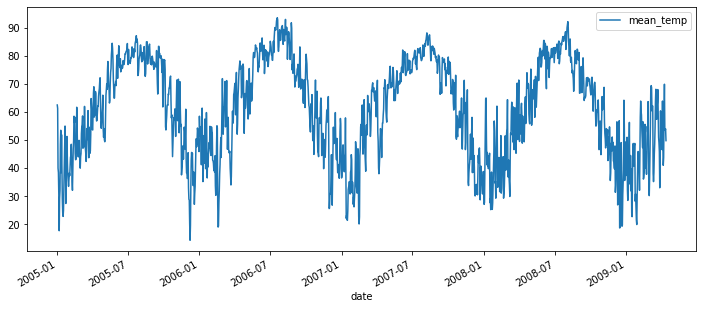

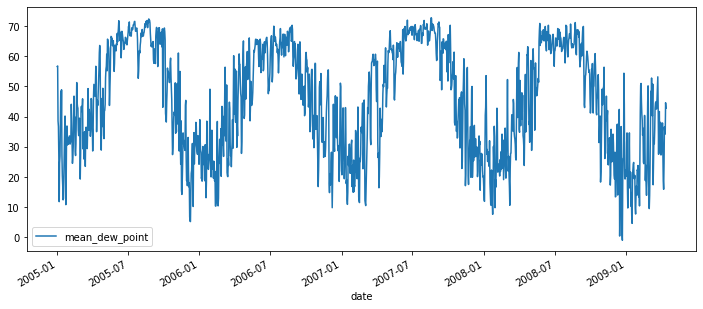

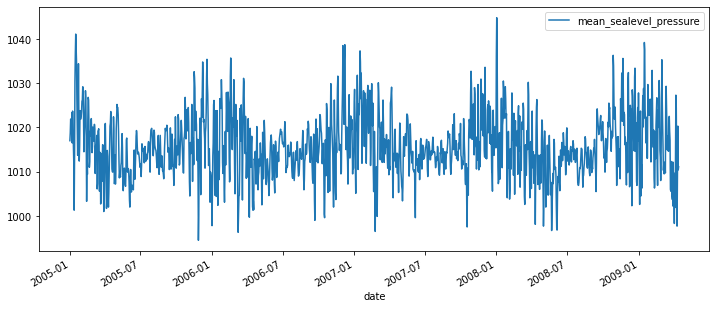

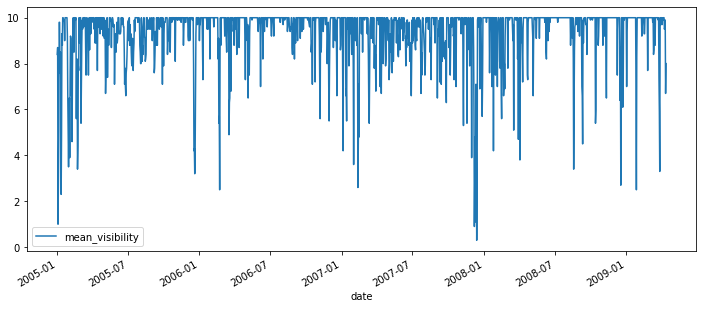

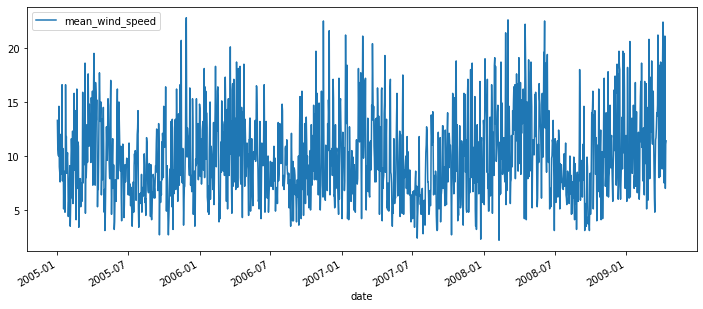

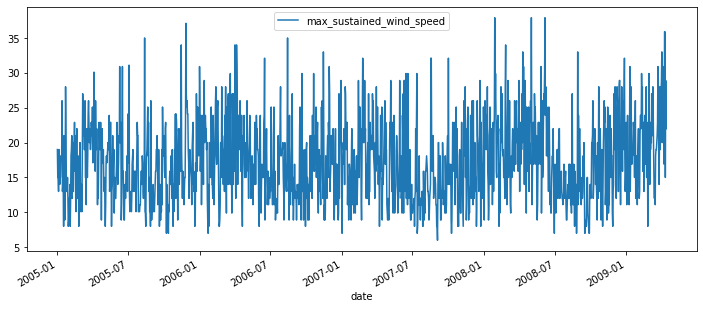

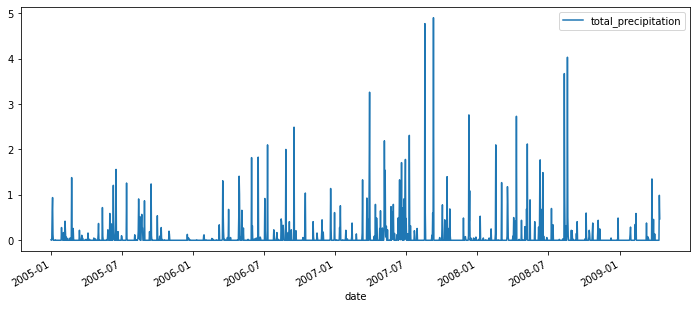

In [603]:
ex_train.plot(y="mean_temp", figsize=(12,5))
ex_train.plot(y="mean_dew_point", figsize=(12,5))
ex_train.plot(y="mean_sealevel_pressure", figsize=(12,5))
ex_train.plot(y="mean_visibility", figsize=(12,5))
ex_train.plot(y="mean_wind_speed", figsize=(12,5))
ex_train.plot(y="max_sustained_wind_speed", figsize=(12,5))
ex_train.plot(y="total_precipitation", figsize=(12,5))

All time series data seem to follow reoccurring patterns and hence it should be well possible to forecast these using classical time series models. Hence, I will use SARIMA models, which may incorporate seasonalities, patterns, recent values, etc. Such models have a number of parameters that have to be chosen prior to training, e.g. how many time lags should be considered, is there seasonality, etc. To choose the best-performing models one can use grid search, test different combinations of these parameters and choose the model based on the AIC, which is an information criterion that evaluates the model fit on the training data and includes a penalty for higher complexity, similar to a regularization parameter.

Instead of doing this grid search procedure manually, I use the pmdarima library which implements just this.

*(**Note:** It might improve the model to include yearly seasonality, however this takes a long time to run and due to time constraints I do not include it here.)*

### 1. Example: mean_temperature

In [ ]:
# kann weg?
from sklearn.metrics import mean_squared_error
# define error metrices
def rmse(testdf, preddf):
    return np.sqrt(mean_squared_error(testdf, preddf))

def mape(testdf, preddf):
    return np.mean(np.abs((testdf - preddf) / testdf)) * 100

In [604]:
# train exemplary model for mean_temperature time series
import pmdarima as pm

model_temp = pm.auto_arima(y=ex_train.mean_temp,
                      start_p=1, start_q=1, 
                      trace=1,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10050.660, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10198.227, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10198.947, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10197.375, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10196.230, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9957.456, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10068.486, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9951.796, Time=0.44 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=10042.765, Time=0.23 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=9952.963, Time=0.59 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9951.173, Time=0.64 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9950.013, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9948.412, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10005.222, Time=0.15 sec
 ARIMA(1,1,3)(0,0,0)[0] i

In [605]:
# define function that iterates through validation set:
# 1. predict one-period-ahead value
# 2. add value to list
# 3. update model with actual value
# 4. repeat for all observations in validation set, i.e. 365 days
def one_period_ahead(model, valTS):
    pred = []
    for new_ob in valTS:
        
        # make prediction and append to list
        forecast = model.predict(n_periods=1)[0]
        pred.append(forecast)
        
        # update existing model
        model.update(new_ob, suppress_warnings=True)
        
    return pred

In [606]:
# step through the validation year and predict one-period ahead
pred_temp = one_period_ahead(model_temp, ex_val.mean_temp)

In [607]:
# define plotting functions
def plot_arima_res(trainTS, valTS, predTS):
    plt.figure(figsize=(20,10))
    plt.plot(trainTS.iloc[1450:].index, trainTS.iloc[1450:], label='Train')
    plt.plot(valTS.index, valTS, label='Test', color="grey")
    plt.plot(valTS.index, predTS, label="auto.arima forecast")
    plt.legend(loc='best', frameon=False)
    plt.show()

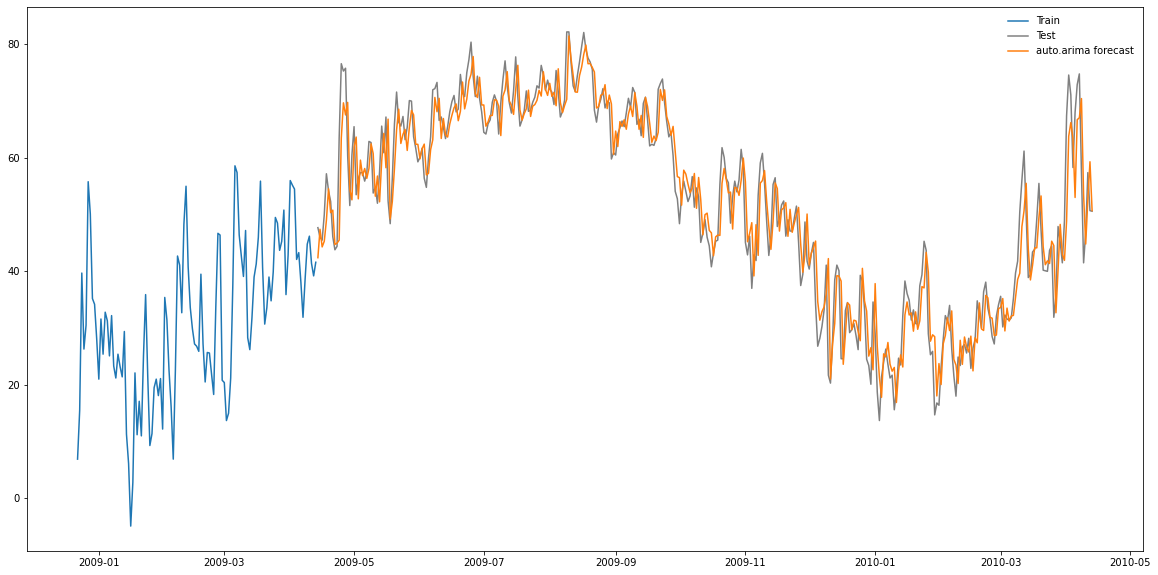

In [608]:
plot_arima_res(temp, ex_val_temp, arima_pred_temp)

Taking a look at the predictions for the mean_temperature reveals an accurate forecast for one-period ahead forecasts. Due to time constraints, I will not take a closer look at the forecasts for the remaining predictors here.

### Create ARIMA models for all predictor variables - Single example station

In [610]:
# define predictors
predictors = ["mean_temp", "mean_dew_point", "mean_sealevel_pressure", "mean_visibility", "mean_wind_speed", "max_sustained_wind_speed", "total_precipitation"]
models = {}

# iterate over predictors, train ARIMA model and store model in dictionary
# dict of the form {"predictor": model_object}
for var in predictors:
    
    # train arima models
    model = pm.auto_arima(y=ex_train[var],
                      start_p=1, start_q=1, 
                      trace=0,
                      stepwise=True)
    
    models[var] = model

In [611]:
# step through the year and predict one-period ahead
preds_visibility = one_period_ahead(models["mean_visibility"], ex_val.mean_visibility)

### Create input for binary classifier for validation set for a single station, i.e. forecast for one year

The next step would then be to predict the input variables for the entire validation time frame:

In [612]:
def forecast_input(models, validationTS, predictors):

    input = {}
    ind = validationTS.index
    
    for var in predictors:
        
        # make one-step ahead predictions
        preds = one_period_ahead(models[var], validationTS[var])
        
        input[var] = preds
        
    
    # convert to pandas dataframe
    inputDF = pd.DataFrame(input, index=ind)
    
    return inputDF

In [613]:
predictors = ["mean_temp", "mean_dew_point", "mean_sealevel_pressure", "mean_visibility", "mean_wind_speed", "max_sustained_wind_speed", "total_precipitation"]
validation_input_single = forecast_input(models, ex_val, predictors)

In [614]:
validation_input_single.head()

,mean_temp,mean_dew_point,mean_sealevel_pressure,mean_visibility,mean_wind_speed,max_sustained_wind_speed,total_precipitation
date,,,,,,,
2009-04-14,50.156563,37.954233,1014.480584,9.607804,12.392460,21.624476,0.096488
2009-04-15,54.594032,38.571959,1015.309827,9.553914,9.861049,18.973874,0.010453
2009-04-16,58.770328,41.433147,1014.840421,9.662124,13.402537,23.026642,0.089133
2009-04-17,60.648799,43.042178,1016.035505,9.662327,13.356484,20.791788,0.066726
2009-04-18,57.187415,44.701556,1016.021905,9.500402,11.895017,20.448243,0.041620


### Creating Input DataFrame for 10 Stations

Now I am going to do the above stated procedure for multiple stations instead of a single station only. However, I will consider only 10 stations due to time constraints. Doing so, I arbitrarily choose the first 10 stations.

In [615]:
stations = list(train.station_number.head(10))
train = train[train["station_number"].isin(stations)]
validate = validate[validate["station_number"].isin(stations)]
test = test[test["station_number"].isin(stations)]

In [617]:
# define predictors in list
predictors = ["mean_temp", "mean_dew_point", "mean_sealevel_pressure", "mean_visibility", "mean_wind_speed", "max_sustained_wind_speed", "total_precipitation"]
models_all = {}

# loop over 10 selected stations and train ARIMA models for all predictors
for st_num in train.station_number.unique():

    models_all[st_num] = {}
    
    # select data
    tr = train[train.station_number == st_num]
    
    for var in predictors:
    
        # train arima models
        model = pm.auto_arima(y=tr[var],
                      start_p=1, start_q=1, 
                      trace=0,
                      stepwise=True)
        
        # store model in dictionary
        models_all[st_num][var] = model

In [618]:
# define a function that iterates over all stations in the training data set and constructs the input data
# for all of the 10 stations
def forecast_input(models, validationTS, predictors):

    # initialize empty list to store DataFrames in
    inputs_df = []
    
    for key, value in models.items():
        
        inp = {}
        mod = models[key]
        station = key
        val = validationTS[validationTS.station_number == station]
        ind = val.index
        
        for var in predictors:
        
            # make one-step ahead predictions
            preds = one_period_ahead(mod[var], val[var])
            inp[var] = preds

        # convert to pandas dataframe
        inputDF = pd.DataFrame(inp, index=ind)
        inputDF["station_number"] = station
        inputs_df.append(inputDF)
    
    # combine distinct DataFrames for each station to a single large DataFrame
    inputs_df = pd.concat(inputs_df)
    
    return inputs_df

In [ ]:
# construct input data for validating classifier later on
inp = forecast_input(models_all, validate, predictors)

## Training a binary classification model

I will now start with a binary classification model. Since it is reasonable to assume that the single predictors have similar influence on whether it snows or not across all stations, I train a pooled model which does not differentiate by station. However, it would be possible to train separate models as well.

#### Baseline Model

To evaluate the quality of the final model, it makes sense to have some kind of simple baseline to compare the predictions against:

In [626]:
train.snow.mean()

0.16417146513115802

The mean of snow is 0.164, which means that it snows on around 16.4 % of the days in the validation set for the chosen stations. Hence, always predicting no snow would result in an accuracy of (1 - 0.164) \* 100 = 83.6 %. This will serve as the baseline.  

As the classifier, I will use a Random Forest classifier since this model is known to provide good results out of the box for many problems. 

In [627]:
X = train.drop(columns=["station_number", "snow"])
y = train.snow

I will tune some of the model's hyperparameters to improve its performance on this specific data set. To do so, I use Random Hyperparameter Tuning over a pre-specified grid of parameters. Out of all possible combinations I randomly select 30 of those, evaluate the model's performance using 5-fold CV and select the best-performing parameter combination.

In [628]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 

In [ ]:
# Random Forest
rf = RandomForestClassifier()
# define hyperparameter grid for tuning
rf_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [1, 5, 10, None],
    "min_samples_split": list(np.arange(2, 11, 1)),
    "min_samples_leaf": [1, 2, 3, 4, 5]
    
}
# tune hyperparameters using Random Search and 5-fold CV
rf_cv = RandomizedSearchCV(rf, rf_grid, n_iter=30, verbose=1)
rf_cv.fit(X, y)

In [629]:
# merge on date and station_number to match snow indicator to correct rows
input_df = pd.merge(inp.reset_index(), validate[["station_number", "snow"]].reset_index(), on=["date", "station_number"]).set_index("date")

In [630]:
# divide validation data into predictors and target
actual_snow = input_df.snow
model_input = input_df.drop(columns = ["snow", "station_number"])

In [631]:
# make predictions
pred_rf = rf_cv.predict(model_input)

In [632]:
from sklearn.metrics import accuracy_score
# calculate performance metrics:
acc_rf = accuracy_score(actual_snow, pred_rf)
acc_rf

0.8838356164383562

Using time series forecasts from ARIMA models as the input to a binary classifier on whether it snows or not improved the accuracy compared to the baseline model from 83.6 % to 88.4 %, which constitutes an improvement of falsely classified observations of 29.2 %.

# Missing due to time constraints:
- retrain the ARIMA models on both the training and the validation set and predict input data for the test set, i.e. tomorrow
- use the binary classifier to predict whether it snows or not

# Further Ideas / Things to try:
- different algorithms for binary classification
- include lagged observations into binary classification to account for past observations and for time series structure of the data